# Daily Challenge - Statistics for Machine Learning

# Applying Inferential Statistics

### Here are the hypotheses to test:
1. Age of people who left the bank and who did not are similar. Alternative: Not similar.
2. Credit score of people who left the bank and who did not are similar. Alternative: Not similar.
3. Balance of people who left the bank and who did not are similar. Alternative: Not similar.
4. Estimated Salary of people who left the bank and who did not are similar. Alternative: Not similar.

#### The most appropriate test to analyse data here is Frequentist test.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy.stats
from scipy.stats import t
from scipy.special import stdtr
from numpy.random import seed
import seaborn as sns

%matplotlib inline
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")

In [3]:
matplotlib.rcParams['figure.figsize'] = (8.0, 5.0)

In [4]:
df = pd.read_csv(r'data_center\Churn_Modelling.csv')

In [6]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [10]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [5]:
df_0 = df[df['Exited'] == 0]
df_1 = df[df['Exited'] == 1]

## Hypothesis 1: Age

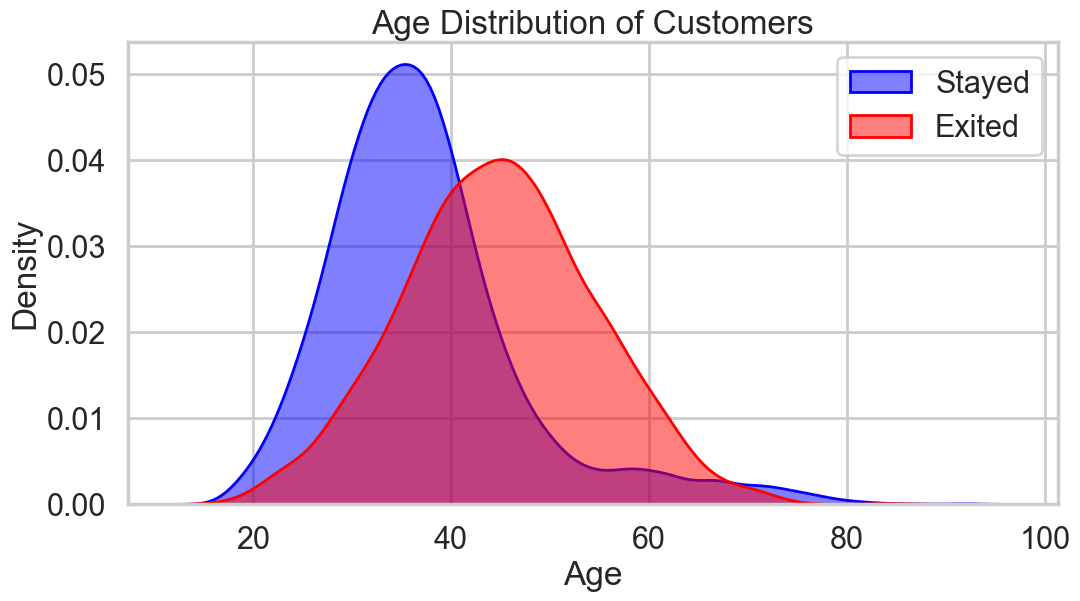

In [9]:
## TODO: Plot the age distribution for customers who stayed with the bank and those who left using seaborn, with different colors for each group and a legend.
plt.figure(figsize=(12, 6))
sns.kdeplot(df_0['Age'], label='Stayed', color='blue', fill=True, alpha=0.5)
sns.kdeplot(df_1['Age'], label='Exited', color='red', fill=True, alpha=0.5)
plt.title('Age Distribution of Customers')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.show()

In [14]:
## TODO: Calculate the mean and standard deviation of the age for customers who stayed with the bank.
mean_age_0 = df_0['Age'].mean()
std_age_0 = df_0['Age'].std()

print(f"Mean Age of Customers Who Stayed: {mean_age_0:.2f} years")
print(f"Standard Deviation of Age of Customers Who Stayed: {std_age_0:.2f} years")

Mean Age of Customers Who Stayed: 37.41 years
Standard Deviation of Age of Customers Who Stayed: 10.13 years


In [15]:
## TODO: Calculate the mean and standard deviation of the age for customers who left the bank.
mean_age_1 = df_1['Age'].mean()
std_age_1 = df_1['Age'].std()

print(f"Mean Age of Customers Who Leave: {mean_age_1:.2f} years")
print(f"Standard Deviation of Age of Customers Who Leave: {std_age_1:.2f} years")

Mean Age of Customers Who Leave: 44.84 years
Standard Deviation of Age of Customers Who Leave: 9.76 years


In [16]:
## TODO: Perform a t-test to compare the ages of customers who stayed and left the bank.
t_stat, p_value = scipy.stats.ttest_ind(df_0['Age'], df_1['Age'], equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-statistic: -30.42, P-value: 0.0000


1. Différence significative

    La p-value très proche de 0 signifie que vous pouvez rejeter l’hypothèse nulle : il y a une différence statistiquement significative entre les âges moyens des clients qui sont restés et ceux qui ont quitté la banque.

2. T-statistic négatif

    Le t-statistic négatif (-30.42) signifie que l'âge moyen des clients restés est significativement inférieur à celui des clients qui ont quitté la banque.

### Using Bootstrapping

In [10]:
## TODO: Write a function to perform bootstrap sampling and calculate the statistic of interest.
def bootstrap_statistic(data, num_samples=1000, statistic=np.mean):
    """Perform bootstrap sampling and calculate the statistic of interest."""
    n = len(data)
    bootstrapped_stats = []
    
    for _ in range(num_samples):
        sample = np.random.choice(data, size=n, replace=True)
        bootstrapped_stats.append(statistic(sample))
    
    return np.array(bootstrapped_stats)

In [18]:
## TODO: Calculate the difference in means and shift the ages to the overall mean.
overall_mean = df['Age'].mean()
ages_stayed = df_0['Age'] - overall_mean
ages_left = df_1['Age'] - overall_mean 

print(f"Overall Mean Age: {overall_mean:.2f} years")
print(f"Mean Age of Customers Who Stayed (Shifted): {ages_stayed.mean():.2f} years")
print(f"Mean Age of Customers Who Left (Shifted): {ages_left.mean():.2f} years")

Overall Mean Age: 38.92 years
Mean Age of Customers Who Stayed (Shifted): -1.51 years
Mean Age of Customers Who Left (Shifted): 5.92 years


In [19]:
## TODO: Perform bootstrap sampling to calculate the standard deviation for both groups and their difference.
bootstrap_stayed = bootstrap_statistic(ages_stayed, num_samples=1000)
bootstrap_left = bootstrap_statistic(ages_left, num_samples=1000)
bootstrap_diff = bootstrap_stayed - bootstrap_left  
bootstrap_std_stayed = np.std(bootstrap_stayed)
bootstrap_std_left = np.std(bootstrap_left)
bootstrap_std_diff = np.std(bootstrap_diff)
print(f"Bootstrap Standard Deviation of Customers Who Stayed: {bootstrap_std_stayed:.2f} years")
print(f"Bootstrap Standard Deviation of Customers Who Left: {bootstrap_std_left:.2f} years")
print(f"Bootstrap Standard Deviation of Difference in Means: {bootstrap_std_diff:.2f} years")  

Bootstrap Standard Deviation of Customers Who Stayed: 0.11 years
Bootstrap Standard Deviation of Customers Who Left: 0.22 years
Bootstrap Standard Deviation of Difference in Means: 0.25 years


In [20]:
## TODO: Calculate the p-value by comparing the difference in means to the bootstrap distribution.
p_value = np.mean(bootstrap_diff >= (ages_stayed.mean() - ages_left.mean()))
print(f"P-value for the difference in means: {p_value:.4f}")

P-value for the difference in means: 0.5140


### Conclusion
Do we reject the Null Hypothesis ? Why ?

Au vue du p-value qui est de 0.5140 qui est LARGEMENT au dessus de 0.05, il n'y a pas de pas de différence statistiquement significative entre l’âge moyen des clients qui sont restés et ceux qui ont quitté la banque.

Cette différence peut être dû à un hasard.

## Hypothesis 2: Credit Score

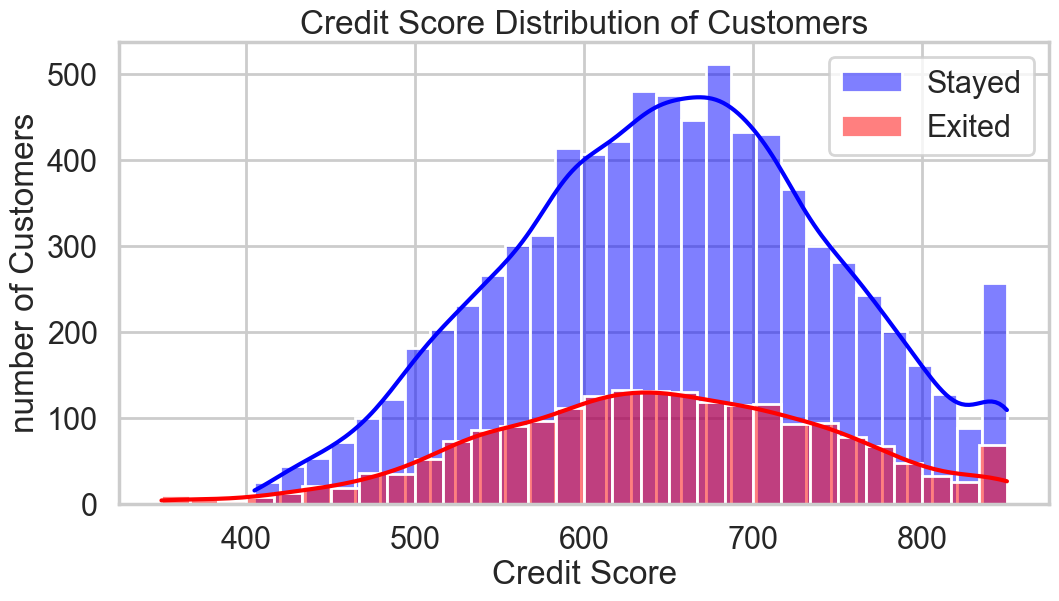

In [23]:
## TODO: Create histograms for the CreditScore distribution of both groups (Still with bank and Left the bank).
plt.figure(figsize=(12, 6))
sns.histplot(df_0['CreditScore'], label='Stayed', color='blue', kde=True, bins=30, alpha=0.5)
sns.histplot(df_1['CreditScore'], label='Exited', color='red', kde=True, bins=30, alpha=0.5)
plt.title('Credit Score Distribution of Customers')
plt.xlabel('Credit Score')
plt.ylabel('number of Customers')
plt.legend()
plt.show()

In [ ]:
## TODO: Perform a t-test to compare the CreditScore between the two groups (Still with bank and Left the bank).
t_stat_credit, p_value_credit = scipy.stats.ttest_ind(df_0['CreditScore'], df_1['CreditScore'], equal_var=False)
print(f"T-statistic for Credit Score: {t_stat_credit:.2f}, P-value for Credit Score: {p_value_credit:.4f}")

T-statistic for Credit Score: -2.63, P-value for Credit Score: 0.0085


### Conclusion
Do we reject the Null Hypothesis ? Why ?
Le p-value est de 0,0085 ce qui est inférieur à 0,05
Il y a une différence significative entre des clients qui ont quitté et ceux qui sont resté dans la banque.
2.63 pour le t-Statistic indique que le de crédit moyen des clients restés est supérieur à celui des clients partis.

Donc le credit Score est un facteur pertinent pour expliquer la fuite des clients

## Hypothesis 3: Balance

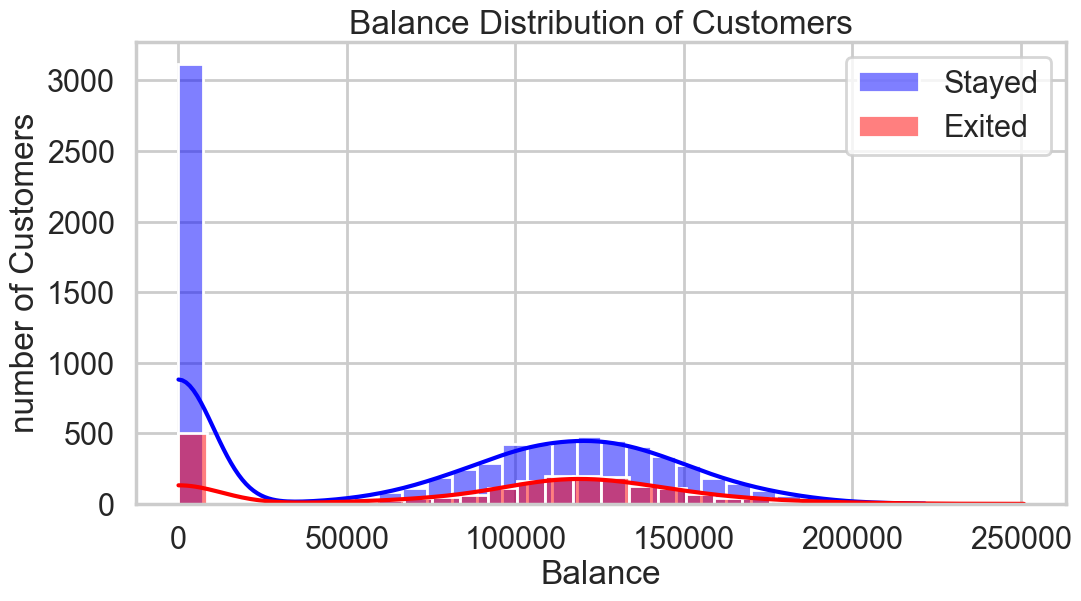

In [ ]:
## TODO: Plot the distribution of Balance for both groups (Still with bank and Left the bank).
plt.figure(figsize=(12, 6))
sns.histplot(df_0['Balance'], label='Stayed', color='blue', kde=True, bins=30, alpha=0.5)
sns.histplot(df_1['Balance'], label='Exited', color='red', kde=True, bins=30, alpha=0.5)
plt.title('Balance Distribution of Customers')
plt.xlabel('Balance')
plt.ylabel('number of Customers')
plt.legend()
plt.show()


In [ ]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left.
t_stat_balance, p_value_balance = scipy.stats.ttest_ind(df_0['Balance'], df_1['Balance'], equal_var=False)
print(f"T-statistic for Balance: {t_stat_balance:.2f}, P-value for Balance: {p_value_balance:.4f}")


T-statistic for Balance: -12.47, P-value for Balance: 0.0000


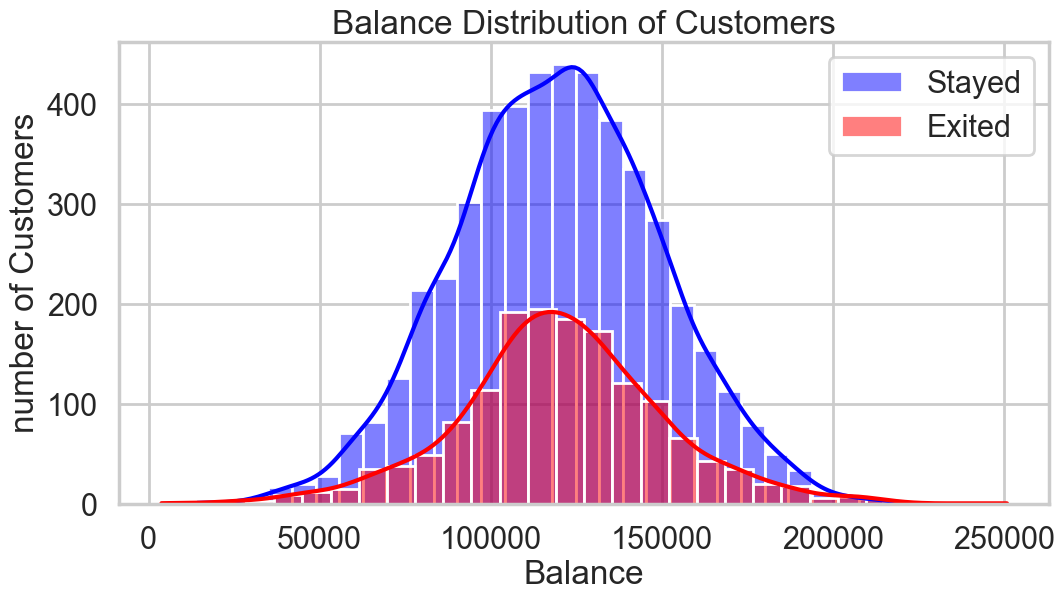

In [30]:
## TODO: Visualize the distribution of Balance for customers who stayed with the bank and those who left, excluding zero balances.plt.figure(figsize=(12, 6))
df_0_non_zero_balance = df_0[df_0['Balance'] != 0]
df_1_non_zero_balance = df_1[df_1['Balance'] != 0]

plt.figure(figsize=(12, 6))
sns.histplot(df_0_non_zero_balance['Balance'], label='Stayed', color='blue', kde=True, bins=30, alpha=0.5)
sns.histplot(df_1_non_zero_balance['Balance'], label='Exited', color='red', kde=True, bins=30, alpha=0.5)
plt.title('Balance Distribution of Customers')
plt.xlabel('Balance')
plt.ylabel('number of Customers')
plt.legend()
plt.show()


In [31]:
## TODO: Perform a t-test to compare the Balance between customers who stayed with the bank and those who left, excluding zero balances.
t_stat_balance, p_value_balance = scipy.stats.ttest_ind(df_0_non_zero_balance['Balance'], df_1_non_zero_balance['Balance'], equal_var=False)
print(f"T-statistic for Balance without 0: {t_stat_balance:.2f}, P-value for Balance without 0: {p_value_balance:.4f}")

T-statistic for Balance without 0: -1.36, P-value for Balance without 0: 0.1738


## Conclusion

Do we reject the Null Hypothesis ? Why ?

La p-value obtenue est 0.1738, bien supérieure au seuil de 0.05.
Cela signifie qu’il n’y a pas de différence statistiquement significative entre la balance moyenne des clients qui sont restés et ceux qui ont quitté la banque (lorsqu’on exclut les soldes à zéro).
La différence observée peut donc s’expliquer par le hasard.
Conclusion : La balance (hors zéros) n’est pas un facteur discriminant pour expliquer le churn dans cette base.

## Hypothesis 4: Estimated Salary

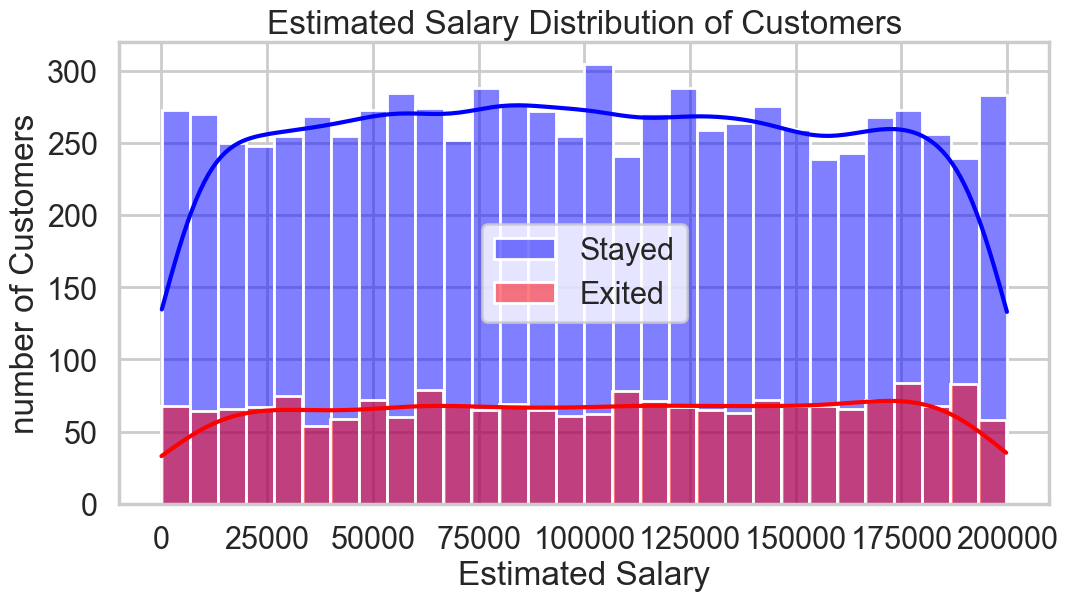

In [6]:
## TODO: Plot the distribution of EstimatedSalary for customers who stayed with the bank and those who left.
plt.figure(figsize=(12, 6))
sns.histplot(df_0['EstimatedSalary'], label='Stayed', color='blue', kde=True, bins=30, alpha=0.5)
sns.histplot(df_1['EstimatedSalary'], label='Exited', color='red', kde=True, bins=30, alpha=0.5)
plt.title('Estimated Salary Distribution of Customers')
plt.xlabel('Estimated Salary')
plt.ylabel('number of Customers')
plt.legend()
plt.show()

In [7]:
## TODO: Perform a t-test to compare the EstimatedSalary between customers who stayed and those who left.
t_stat_salary, p_value_salary = scipy.stats.ttest_ind(df_0['EstimatedSalary'], df_1['EstimatedSalary'], equal_var=False)
print(f"T-statistic for Estimated Salary: {t_stat_salary:.2f}, P-value for Estimated Salary: {p_value_salary:.4f}") 


T-statistic for Estimated Salary: -1.20, P-value for Estimated Salary: 0.2289


Non, nous ne devons pas rejeter l’hypothèse nulle pour la comparaison des salaires estimés.

La p-value obtenue est 0.2289, bien supérieure au seuil de 0.05.
Cela signifie qu’il n’y a pas de différence statistiquement significative entre le salaire estimé moyen des clients qui sont restés et ceux qui ont quitté la banque.
La différence observée peut donc s’expliquer par le hasard.
Conclusion : Le salaire estimé n’est pas un facteur discriminant pour expliquer le churn dans cette base.

### Using Bootstrapping

In [8]:
## TODO: Calculate the difference in means and shift the EstimatedSalary for both groups.
overall_mean_salary = df['EstimatedSalary'].mean()
estimated_salary_stayed = df_0['EstimatedSalary'] - overall_mean_salary
estimated_salary_left = df_1['EstimatedSalary'] - overall_mean_salary
print(f"Overall Mean Estimated Salary: {overall_mean_salary:.2f}")
print(f"Mean Estimated Salary of Customers Who Stayed (Shifted): {estimated_salary_stayed.mean():.2f}")
print(f"Mean Estimated Salary of Customers Who Left (Shifted): {estimated_salary_left.mean():.2f}")

Overall Mean Estimated Salary: 100090.24
Mean Estimated Salary of Customers Who Stayed (Shifted): -351.85
Mean Estimated Salary of Customers Who Left (Shifted): 1375.44


In [11]:
## TODO: Calculate the bootstrap sample means for both groups and their difference.
bootstrap_stayed_salary = bootstrap_statistic(estimated_salary_stayed, num_samples=1000)
bootstrap_left_salary = bootstrap_statistic(estimated_salary_left, num_samples=1000)
bootstrap_diff_salary = bootstrap_stayed_salary - bootstrap_left_salary
bootstrap_std_stayed_salary = np.std(bootstrap_stayed_salary)
bootstrap_std_left_salary = np.std(bootstrap_left_salary)
bootstrap_std_diff_salary = np.std(bootstrap_diff_salary)
print(f"Bootstrap Standard Deviation of Customers Who Stayed: {bootstrap_std_stayed_salary:.2f}")
print(f"Bootstrap Standard Deviation of Customers Who Left: {bootstrap_std_left_salary:.2f}")
print(f"Bootstrap Standard Deviation of Difference in Means: {bootstrap_std_diff_salary:.2f}")

Bootstrap Standard Deviation of Customers Who Stayed: 679.71
Bootstrap Standard Deviation of Customers Who Left: 1271.58
Bootstrap Standard Deviation of Difference in Means: 1435.28


In [13]:
## TODO: Calculate the p-value based on the bootstrap distribution of the difference in means.
p_value_salary = np.mean(bootstrap_diff_salary >= (estimated_salary_stayed.mean() - estimated_salary_left.mean()))
print(f"P-value for the difference in means of Estimated Salary: {p_value_salary:.4f}")

P-value for the difference in means of Estimated Salary: 0.4980


### Conclusion
Do we reject the Null Hypothesis ? Why ?

Au vue du p-value qui est de 0.4980 qui est LARGEMENT au dessus de 0.05, il n'y a pas de pas de différence statistiquement significative entre le revenu moyen des clients qui sont restés et ceux qui ont quitté la banque.

Cette différence peut être dû à un hasard.

## Final Conclusion
What will be the most helpful feature in predicting churning?
